<a href="https://colab.research.google.com/github/aaron-zhang24/MLB-Postseason-vs-Regular-Season-Comparison/blob/main/cs181_final_project_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lets_plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
from lets_plot import *
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Mounted at /content/drive


# **Batter Regular Season Stars**

In [ ]:
import pandas as pd

# Define the base paths for data
regular_szn_data_directory = "/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/"
postseason_data_directory = "/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/"
seasons = [2024, 2023, 2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

# Generalized function to load and merge season data
def load_and_merge_season_data(season, data_directory, suffix):
    """
    Load and merge season data for a given season.

    Parameters:
    - season: The year of the season (e.g., 2024).
    - data_directory: The base path for the data (e.g., regular or postseason).
    - suffix: The suffix for the file naming convention ('_rs' for regular season, '_ps' for postseason).

    Returns:
    - merged_season_data: The merged DataFrame for the given season.
    """
    main_stats_file = f"{data_directory}fangraphs-leaderboards_{season}{suffix}.csv"
    win_stats_file = f"{data_directory}fangraphs-leaderboards_{season}_win{suffix}.csv"

    # Load datasets
    main_stats_data = pd.read_csv(main_stats_file)
    win_stats_data = pd.read_csv(win_stats_file)

    # Merge datasets on the 'Name' column
    merged_season_data = main_stats_data.merge(win_stats_data, on='Name')
    return merged_season_data

# Step 1: Load and merge regular season data
regular_season_dataframes = [
    load_and_merge_season_data(season, regular_szn_data_directory, '_rs') for season in seasons
]

# Step 2: Load and merge postseason data
postseason_dataframes = [
    load_and_merge_season_data(season, postseason_data_directory, '_ps') for season in seasons
]

# Step 3: Concatenate all regular season and postseason DataFrames
combined_regular_season_df = pd.concat(regular_season_dataframes, ignore_index=True)
combined_postseason_df = pd.concat(postseason_dataframes, ignore_index=True)

# Step 4: Aggregate by 'Name' and compute averages for numeric columns
aggregated_regular_season_df = combined_regular_season_df.groupby('Name').mean(numeric_only=True).reset_index()
aggregated_postseason_df = combined_postseason_df.groupby('Name').mean(numeric_only=True).reset_index()

# Display results
star_players_regular_szn = aggregated_regular_season_df.query("WAR > 3.75")
star_players_postseason = aggregated_postseason_df[aggregated_postseason_df['Name'].isin(star_players_regular_szn['Name'])].reset_index()
star_players_postseason



,index,Name,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,PlayerId_y,MLBAMID_y
0,10,Aaron Hicks,5.200000,18.200000,0.600000,1.600000,2.800000,0.200000,0.173059,0.154824,0.165115,0.163518,0.164344,0.312588,0.329459,0.291771,NaN,82.747700,NaN,NaN,NaN,NaN,5297.0,543305.0,0.002600,-0.279762,0.282362,0.260600,0.024101,0.832384,1.3915,0.400000,-0.047089,0.045568,5297.0,543305.0
1,12,Aaron Judge,8.500000,37.833333,2.166667,5.666667,4.833333,0.833333,0.114239,0.263198,0.219701,0.277425,0.240970,0.330666,0.460671,0.337813,NaN,115.353238,NaN,NaN,NaN,NaN,15640.0,592450.0,0.106832,-0.618835,0.725667,1.688667,0.164624,0.847031,NaN,0.000000,0.127772,0.002535,15640.0,592450.0
2,20,Adam Eaton,17.000000,75.000000,2.000000,11.000000,10.000000,1.000000,0.133333,0.120000,0.163934,0.260000,0.245902,0.361111,0.409836,0.335551,NaN,104.265675,NaN,NaN,NaN,NaN,11205.0,594809.0,0.294948,-1.041624,1.336572,3.345000,0.339226,0.897666,NaN,0.000000,0.158193,0.170379,11205.0,594809.0
3,34,Adley Rutschman,2.500000,10.500000,0.000000,0.000000,0.000000,0.000000,0.038462,0.201923,0.041667,0.133333,0.104167,0.139423,0.145833,0.129709,NaN,-24.635626,NaN,NaN,NaN,NaN,26288.0,668939.0,-0.201367,-0.274367,0.073000,-1.312000,-0.135899,1.481615,NaN,0.000000,-0.135154,0.008610,26288.0,668939.0
4,36,Adrian Beltré,6.000000,25.500000,1.250000,3.750000,2.500000,0.000000,0.052412,0.129167,0.092172,0.253472,0.222538,0.263158,0.314710,0.253606,NaN,55.034282,NaN,NaN,NaN,NaN,639.0,134181.0,0.121909,-0.443079,0.564987,-0.335500,-0.031745,0.910493,NaN,0.000000,0.059265,0.053452,639.0,134181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1358,Xander Bogaerts,8.500000,34.500000,1.000000,4.333333,3.333333,0.000000,0.085508,0.221895,0.142277,0.249400,0.209466,0.273335,0.351742,0.270949,NaN,64.358147,NaN,NaN,NaN,NaN,12161.0,593428.0,-0.074106,-0.591855,0.517749,-0.902500,-0.083125,0.980306,1.2200,0.166667,0.037957,-0.128379,12161.0,593428.0
113,1363,Yadier Molina,8.625000,34.750000,0.250000,2.500000,2.875000,0.125000,0.039090,0.130675,0.039276,0.210705,0.184702,0.219699,0.223978,0.194708,NaN,19.950521,NaN,NaN,NaN,NaN,7007.0,425877.0,-0.084280,-0.574680,0.490401,-0.139500,-0.021748,1.048512,NaN,0.000000,-0.031727,-0.052173,7007.0,425877.0
114,1366,Yan Gomes,4.400000,11.200000,0.000000,1.200000,0.800000,0.000000,0.085125,0.296953,0.097126,0.370000,0.264943,0.324731,0.362069,0.292222,NaN,82.998168,NaN,NaN,NaN,NaN,9627.0,543228.0,0.031860,-0.157701,0.189561,0.340000,0.033899,1.089328,1.0313,0.600000,-0.014969,0.042760,9627.0,543228.0
115,1369,Yasmani Grandal,6.166667,19.000000,0.666667,0.833333,2.000000,0.000000,0.177708,0.330263,0.243227,0.116113,0.136877,0.297124,0.380104,0.293614,NaN,82.114234,NaN,NaN,NaN,NaN,11368.0,518735.0,-0.121621,-0.398690,0.277070,-1.345333,-0.149736,1.035382,1.6148,1.500000,-0.101880,-0.003583,11368.0,518735.0


# **Pitchers**

In [ ]:
# Define the base paths for regular season and postseason pitching data
regular_szn_pitching_directory = "/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/"
postseason_pitching_directory = "/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/"
seasons = [2024, 2023, 2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

# Generalized function to load and merge pitching data for a given season
def load_and_merge_pitching_data(season, data_directory, suffix):
    """
    Load and merge pitching data for a specific season and directory.

    Parameters:
    - season: The year of the season (e.g., 2024).
    - data_directory: The base path for the data (e.g., regular or postseason).
    - suffix: The suffix for the file naming convention ('_rs' for regular season, '_ps' for postseason).

    Returns:
    - merged_season_data: The merged DataFrame for the given season.
    """
    pitching_stats_file = f"{data_directory}pitching_stats/fangraphs-leaderboards_{season}{suffix}.csv"
    win_prob_file = f"{data_directory}win_prob/fangraphs-leaderboards_{season}_win{suffix}.csv"

    # Load datasets
    pitching_stats_data = pd.read_csv(pitching_stats_file)
    win_prob_data = pd.read_csv(win_prob_file)

    # Merge datasets on the 'Name' column
    merged_season_data = pitching_stats_data.merge(win_prob_data, on='Name')
    return merged_season_data

# Step 1: Load and merge regular season pitching data
regular_season_pitching_dataframes = [
    load_and_merge_pitching_data(season, regular_szn_pitching_directory, '_rs') for season in seasons
]

# Step 2: Load and merge postseason pitching data
postseason_pitching_dataframes = [
    load_and_merge_pitching_data(season, postseason_pitching_directory, '_ps') for season in seasons
]

# Step 3: Concatenate all regular season and postseason pitching DataFrames
combined_regular_season_pitching_df = pd.concat(regular_season_pitching_dataframes, ignore_index=True)
combined_postseason_pitching_df = pd.concat(postseason_pitching_dataframes, ignore_index=True)

# Step 4: Aggregate by 'Name' and compute averages for numeric columns
aggregated_regular_season_pitching_df = combined_regular_season_pitching_df.groupby('Name').mean(numeric_only=True).reset_index()
aggregated_postseason_pitching_df = combined_postseason_pitching_df.groupby('Name').mean(numeric_only=True).reset_index()

star_pitchers_regular_szn = aggregated_regular_season_pitching_df.query('WAR > 2.75')
star_pitchers_postseason = aggregated_postseason_pitching_df[aggregated_postseason_pitching_df['Name'].isin(star_pitchers_regular_szn['Name'])].reset_index()

star_pitchers_postseason

,index,Name,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,SD,MD,PlayerId_y,MLBAMID_y
0,10,Aaron Nola,1.666667,1.333333,0.000000,3.333333,3.333333,17.733333,10.955844,2.306155,1.928402,0.301507,0.745381,0.356269,0.201058,NaN,4.818972,NaN,4.379979,3.149368,NaN,16149.0,605400.0,0.169549,-1.075735,1.245283,1.495000,0.137955,0.832000,0.825617,0.870000,0.929500,3.333333,0.126084,0.075134,0.000000,0.000000,16149.0,605400.0
1,16,Adam Wainwright,0.500000,0.833333,0.000000,3.000000,2.333333,15.400000,9.573391,1.823571,1.282857,0.284696,0.845532,0.470744,0.290570,NaN,2.998571,NaN,3.496735,2.836371,NaN,2233.0,425794.0,0.056675,-0.983216,1.039891,0.517367,0.059794,0.926451,1.035397,0.855567,1.169164,2.833333,0.123807,-0.058504,0.166667,0.166667,2233.0,425794.0
2,67,Blake Snell,1.000000,0.500000,0.500000,3.000000,2.000000,9.150000,11.503820,2.963415,1.173019,0.305556,0.870370,0.198545,0.091912,NaN,3.148629,NaN,3.288982,4.007245,NaN,13543.0,605483.0,-0.025803,-0.804880,0.779077,0.393300,0.028133,1.057092,0.894353,0.989033,1.037017,2.500000,-0.056993,0.052708,0.500000,0.000000,13543.0,605483.0
3,116,C.J. Wilson,0.333333,2.000000,0.000000,3.666667,3.333333,17.433333,9.381610,7.768596,1.136008,0.413679,0.571051,0.529132,0.132576,NaN,16.661462,NaN,5.372362,5.213800,NaN,3580.0,450351.0,-0.254298,-1.461212,1.206914,-2.974333,-0.287026,1.134588,1.652000,0.934622,1.072750,3.666667,-0.247000,0.069975,0.000000,0.000000,3580.0,450351.0
4,149,Chris Sale,0.333333,1.000000,0.000000,3.333333,2.333333,11.100000,12.086457,3.208896,2.103698,0.349953,0.595707,0.356693,0.192881,NaN,6.829335,NaN,4.761458,3.623473,NaN,10603.0,519242.0,-0.173932,-1.053811,0.879879,-1.135300,-0.135433,1.073955,0.931255,0.863978,1.127644,3.000000,-0.113263,-0.007807,0.333333,0.000000,10603.0,519242.0
5,160,Clayton Kershaw,1.000000,1.222222,0.111111,3.222222,2.777778,16.300000,9.155556,4.686741,4.356925,0.341170,0.600989,0.438551,0.187037,NaN,22.282482,NaN,9.088480,5.868765,NaN,2036.0,477132.0,-0.048907,-1.155530,1.106623,-0.675311,-0.065416,0.994423,1.888734,1.079879,1.138273,3.000000,0.014445,-0.048959,0.111111,0.111111,2036.0,477132.0
6,162,Cliff Lee,1.500000,1.500000,0.000000,3.000000,3.000000,20.600000,12.679906,1.752336,0.252336,0.445349,0.652311,0.419118,0.031250,NaN,5.137850,NaN,1.224512,2.036000,NaN,1636.0,424324.0,0.181826,-1.625347,1.807175,1.824400,0.175258,1.170044,NaN,0.885900,0.887925,2.500000,0.393761,-0.209571,0.000000,0.000000,1636.0,424324.0
7,170,Cole Hamels,0.400000,0.600000,0.000000,1.400000,1.200000,7.840000,7.770001,3.810002,0.810001,0.275225,0.657849,0.478810,0.058586,NaN,4.020003,NaN,3.922097,4.555664,NaN,4972.0,430935.0,0.119889,-0.575460,0.695349,0.561000,0.066567,1.433707,2.291200,1.168300,1.430500,1.200000,0.111386,-0.038784,0.200000,0.000000,4972.0,430935.0
8,175,Corbin Burnes,0.250000,0.500000,0.000000,2.250000,0.750000,6.750000,8.656250,2.781250,1.687500,0.207126,0.875000,0.389493,0.187500,NaN,3.031250,NaN,4.712302,3.775850,NaN,19361.0,669203.0,0.102781,-0.368417,0.471198,1.201375,0.123139,0.945580,0.965399,0.914892,1.405690,2.000000,0.178023,-0.080126,0.750000,0.250000,19361.0,669203.0
9,176,Corey Kluber,1.000000,1.000000,0.000000,2.500000,2.250000,11.400000,8.160603,2.554345,4.414081,0.217546,0.865020,0.407550,0.361607,NaN,6.934674,NaN,8.945104,4.792265,NaN,2429.0,446372.0,-0.024044,-0.886156,0.862112,0.132500,0.022258,1.176389,1.318943,1.375900,0.445456,2.250000,-0.120372,0.092783,0.000000,0.250000,2429.0,446372.0


# **Below Is Setting Up Regular Season Dataset**

In [ ]:
df2024_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2024_rs.csv")
df2024_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2024_win_rs.csv")

df_2024_reg_season = df2024_rg.merge(df2024_wp, left_on='Name', right_on = 'Name')
# df_2024_reg_season.query('Name == "Shohei Ohtani"')

In [ ]:
df2023_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2023_rs.csv")
df2023_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2023_win_rs.csv")

df_2023_reg_season = df2023_rg.merge(df2023_wp, left_on='Name', right_on = 'Name')
# df_2023_reg_season.query('Name == "Shohei Ohtani"')

In [ ]:
df2022_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2022_rs.csv")
df2022_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2022_win_rs.csv")

df_2022_reg_season = df2022_rg.merge(df2022_wp, left_on='Name', right_on = 'Name')
# df_2022_reg_season.query('Name == "Shohei Ohtani"')

In [ ]:
df2021_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2021_rs.csv")
df2021_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2021_win_rs.csv")

df_2021_reg_season = df2021_rg.merge(df2021_wp, left_on='Name', right_on = 'Name')
# df_2021_reg_season.query('Name == "Shohei Ohtani"')

In [ ]:
df2019_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2019_rs.csv")
df2019_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2019_win_rs.csv")

df_2019_reg_season = df2019_rg.merge(df2019_wp, left_on='Name', right_on = 'Name')
# df_2019_reg_season.query('Name == "Shohei Ohtani"')

In [ ]:
df2018_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2018_rs.csv")
df2018_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2018_win_rs.csv")

df_2018_reg_season = df2018_rg.merge(df2018_wp, left_on='Name', right_on = 'Name')
# df_2018_reg_season.query('Name == "Shohei Ohtani"')

In [ ]:
df2017_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2017_rs.csv")
df2017_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2017_win_rs.csv")

df_2017_reg_season = df2017_rg.merge(df2017_wp, left_on='Name', right_on = 'Name')
# df_2017_reg_season.head()

In [ ]:
df2016_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2016_rs.csv")
df2016_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2016_win_rs.csv")

df_2016_reg_season = df2016_rg.merge(df2016_wp, left_on='Name', right_on = 'Name')
# df_2016_reg_season.head()

In [ ]:
df2015_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2015_rs.csv")
df2015_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2015_win_rs.csv")

df_2015_reg_season = df2015_rg.merge(df2015_wp, left_on='Name', right_on = 'Name')
# df_2015_reg_season.head()

In [ ]:
df2014_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2014_rs.csv")
df2014_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2014_win_rs.csv")

df_2014_reg_season = df2014_rg.merge(df2014_wp, left_on='Name', right_on = 'Name')
# df_2014_reg_season.head()

In [ ]:
df2013_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2013_rs.csv")
df2013_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2013_win_rs.csv")

df_2013_reg_season = df2013_rg.merge(df2013_wp, left_on='Name', right_on = 'Name')
# df_2013_reg_season.head()

In [ ]:
df2012_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2012_rs.csv")
df2012_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2012_win_rs.csv")

df_2012_reg_season = df2012_rg.merge(df2012_wp, left_on='Name', right_on = 'Name')
# df_2012_reg_season.head()

In [ ]:
df2011_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2011_rs.csv")
df2011_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2011_win_rs.csv")

df_2011_reg_season = df2011_rg.merge(df2011_wp, left_on='Name', right_on = 'Name')
# df_2011_reg_season.head()

In [ ]:
df2010_rg = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2010_rs.csv")
df2010_wp = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Batting_Data/fangraphs-leaderboards_2010_win_rs.csv")

df_2010_reg_season = df2010_rg.merge(df2010_wp, left_on='Name', right_on = 'Name')
# df_2010_reg_season.head()

In [ ]:
# Assuming df_YEAR_reg_season DataFrames are already created:
dfs = [df_2024_reg_season, df_2023_reg_season, df_2022_reg_season, df_2021_reg_season, df_2019_reg_season, df_2018_reg_season, df_2017_reg_season, df_2016_reg_season, df_2015_reg_season, df_2014_reg_season, df_2013_reg_season, df_2012_reg_season, df_2011_reg_season, df_2010_reg_season]

# Step 1: Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: Handle missing data (fill with NaN by default for concat)
# (Optional: If needed, handle NaN values differently, such as filling with 0 or ignoring rows)

# Step 3: Group by 'Name' and compute averages for numeric columns
aggregated_df = combined_df.groupby('Name').mean(numeric_only=True).reset_index()

# Step 4: Optionally, count how many years of data each player contributed
player_counts = combined_df.groupby('Name').size().reset_index(name='Years_Contributed')

# Merge the player counts back to the aggregated DataFrame (optional)
result_df_rs = aggregated_df.merge(player_counts, on='Name')
aggregated_df
# Display the result
# result_df_rs

,Name,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,PlayerId_y,MLBAMID_y
0,A.J. Ellis,133.000000,505.000000,13.000000,44.0,52.000000,0.000000,0.128713,0.211881,0.144208,0.328990,0.269504,0.372745,0.413712,0.341222,NaN,117.339205,-3.333104,7.102253,2.797970,2.646581,5677.0,454560.0,-0.821594,-9.304131,8.482536,2.409000,0.248847,1.114918,0.974667,3.000000,0.927579,-1.664489,5677.0,454560.0
1,A.J. Pierzynski,132.333333,517.333333,17.666667,53.0,67.666667,1.333333,0.034820,0.123734,0.164869,0.282307,0.273357,0.307404,0.438226,0.322033,NaN,96.290268,-4.413077,-6.537792,6.397549,1.803698,746.0,150229.0,-0.659202,-9.877677,9.218474,-2.500667,-0.237323,1.032634,1.975121,8.333333,-0.694859,0.062464,746.0,150229.0
2,AJ Pollock,147.500000,600.000000,17.000000,86.0,66.000000,21.000000,0.069736,0.159101,0.162708,0.308066,0.280335,0.329617,0.443043,0.334099,0.3320,111.582181,2.164767,12.001427,3.701144,3.651685,9256.0,572041.0,1.704155,-10.615307,12.319462,10.208251,1.008541,1.023643,2.172136,4.500000,1.153202,0.550505,9256.0,572041.0
3,Aaron Hicks,137.000000,581.000000,27.000000,90.0,79.000000,11.000000,0.154905,0.191050,0.218750,0.264368,0.247917,0.366149,0.466667,0.359850,0.3720,128.535126,2.471690,22.291049,-3.200423,4.005417,5297.0,543305.0,2.239968,-8.789494,11.029462,34.355701,3.401719,0.931949,1.909767,6.000000,2.849008,-0.445476,5297.0,543305.0
4,Aaron Hill,141.000000,590.000000,17.500000,69.0,68.500000,10.250000,0.065396,0.142861,0.160699,0.264164,0.249087,0.304063,0.409785,0.311741,NaN,90.875290,-0.332688,-5.109334,1.691327,1.608978,6104.0,431094.0,-0.897468,-10.458124,9.560656,-3.254450,-0.364554,0.966489,1.544108,3.250000,0.053957,-0.969406,6104.0,431094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Zach McKinstry,148.000000,518.000000,9.000000,60.0,35.000000,16.000000,0.084942,0.218147,0.120690,0.284058,0.230603,0.302326,0.351293,0.288966,0.3120,82.232399,1.113432,-9.914426,2.586107,1.043594,19392.0,656716.0,-1.854711,-9.025570,7.170859,-18.629002,-1.864610,0.952139,1.610450,28.000000,-1.800576,-0.147365,19392.0,656716.0
592,Zach Neto,155.000000,602.000000,23.000000,70.0,77.000000,30.000000,0.064784,0.232558,0.193727,0.294737,0.249077,0.317726,0.442804,0.329956,0.3180,114.116711,1.793801,11.517592,2.198725,3.489166,31347.0,687263.0,1.031384,-10.572071,11.603456,15.370001,1.630832,1.023856,2.484200,1.000000,0.190469,0.816884,31347.0,687263.0
593,Zack Cozart,135.800000,555.200000,14.200000,68.2,49.800000,3.600000,0.066980,0.163614,0.156578,0.281750,0.254052,0.306378,0.410630,0.309055,0.3095,89.326056,0.951472,-5.989003,7.417227,1.943765,2616.0,446359.0,-1.042070,-9.683477,8.641407,-7.690500,-0.868523,0.971827,1.307931,4.800000,-0.165184,-0.848599,2616.0,446359.0
594,Zack Gelof,138.000000,547.000000,17.000000,60.0,49.000000,25.000000,0.069470,0.343693,0.150905,0.296296,0.211268,0.270221,0.362173,0.276421,0.2730,82.200736,4.283345,-6.856906,2.547972,1.438204,29766.0,680869.0,-2.604695,-10.934014,8.329320,-22.172001,-2.462584,1.033201,NaN,0.000000,-1.558894,-0.962101,29766.0,680869.0


In [ ]:
star_df_reg_szn = result_df_rs.query('WAR >= 3.75')
star_df_reg_szn
#star_df_reg_szn.to_csv('/content/drive/MyDrive/Data_AV_Batting_Stars/batting_stars_regular_season.csv', index=False)

,Name,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,PlayerId_y,MLBAMID_y,Years_Contributed
3,Aaron Hicks,137.000000,581.000000,27.000000,90.000000,79.000000,11.000000,0.154905,0.191050,0.218750,0.264368,0.247917,0.366149,0.466667,0.359850,0.372000,128.535126,2.471690,22.291049,-3.200423,4.005417,5297.0,543305.0,2.239968,-8.789494,11.029462,34.355701,3.401719,0.931949,1.909767,6.000000,2.849008,-0.445476,5297.0,543305.0,1
5,Aaron Judge,154.500000,677.750000,52.750000,118.000000,121.750000,10.250000,0.163551,0.262681,0.338556,0.349188,0.300984,0.419387,0.639540,0.437790,0.453750,187.094866,-0.096377,69.658968,-2.966326,9.121620,15640.0,592450.0,5.165147,-10.233917,15.399065,67.590626,7.006866,0.992968,2.219000,2.750000,6.918570,-1.760746,15640.0,592450.0,4
8,Adam Eaton,146.000000,647.250000,11.000000,92.000000,49.750000,15.500000,0.088107,0.167220,0.134319,0.337865,0.287695,0.362439,0.422013,0.342865,0.322000,115.984987,3.513887,15.700000,1.216361,3.955086,11205.0,594809.0,1.827963,-10.319020,12.146982,15.165425,1.564381,0.993085,2.410005,2.500000,1.318176,0.502124,11205.0,594809.0,4
15,Adley Rutschman,151.000000,662.500000,19.500000,76.000000,79.500000,1.000000,0.112412,0.154229,0.149134,0.287448,0.263824,0.346136,0.412959,0.330272,0.346000,115.402091,-2.394824,10.111210,8.339083,4.125931,26288.0,668939.0,1.389799,-10.136447,11.526247,15.565600,1.602772,0.925238,1.728560,6.000000,1.118726,0.367748,26288.0,668939.0,2
18,Adrian Beltré,148.428571,626.142857,27.857143,85.714286,95.000000,1.142857,0.067372,0.113708,0.212218,0.311171,0.309287,0.358096,0.521505,0.375201,0.363000,132.954003,-0.589806,23.290320,8.027488,5.498867,639.0,134181.0,1.927172,-10.395294,12.322465,21.624857,2.149067,0.978608,1.212150,0.714286,2.617864,-0.623809,639.0,134181.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Xander Bogaerts,149.444444,642.111111,18.111111,88.000000,78.666667,9.333333,0.084946,0.181219,0.165218,0.333121,0.290253,0.354796,0.455471,0.348572,0.328125,117.333104,2.285710,16.054889,2.836686,4.104525,12161.0,593428.0,1.070913,-10.973062,12.043975,12.416267,1.163962,1.006497,1.980880,0.777778,0.834992,0.229814,12161.0,593428.0,9
575,Yadier Molina,136.375000,537.500000,13.000000,53.375000,69.750000,5.750000,0.064553,0.108679,0.140482,0.303157,0.289224,0.338236,0.429706,0.332156,0.314500,109.362267,-3.545783,2.490807,24.494792,4.578208,7007.0,425877.0,0.957448,-9.337497,10.294945,10.822125,1.192446,1.006801,2.324433,2.750000,0.682086,0.360019,7007.0,425877.0,8
577,Yan Gomes,135.000000,518.000000,21.000000,61.000000,74.000000,0.000000,0.046332,0.231660,0.193814,0.325714,0.278351,0.312741,0.472165,0.340050,NaN,117.250451,0.685257,10.507341,18.142209,4.929939,9627.0,543228.0,0.447752,-10.508068,10.955820,7.503000,0.807807,1.132352,2.345000,4.000000,0.650135,-0.254717,9627.0,543228.0,1
581,Yasmani Grandal,146.500000,575.000000,26.000000,72.000000,72.500000,3.500000,0.155732,0.229659,0.223611,0.278584,0.243262,0.364584,0.466873,0.356274,0.351500,122.986323,-2.987928,13.684761,23.476546,5.507028,11368.0,518735.0,0.561172,-10.488344,11.049516,17.968100,1.946754,1.026176,1.294375,15.000000,1.857711,-1.309983,11368.0,518735.0,2


# **Below Is Setting Up Postseason Dataset**

In [ ]:
df2024_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2024_ps.csv")
df2024_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2024_win_ps.csv")

df_2024_postseason = df2024_ps.merge(df2024_wp_ps, left_on='Name', right_on = 'Name')
# df_2024_postseason.head()

In [ ]:
df2023_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2023_ps.csv")
df2023_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2023_win_ps.csv")

df_2023_postseason = df2023_ps.merge(df2023_wp_ps, left_on='Name', right_on = 'Name')
# df_2023_postseason.head()

In [ ]:
df2022_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2022_ps.csv")
df2022_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2022_win_ps.csv")

df_2022_postseason = df2022_ps.merge(df2022_wp_ps, left_on='Name', right_on = 'Name')
# df_2022_postseason.head()

In [ ]:
df2021_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2021_ps.csv")
df2021_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2021_win_ps.csv")

df_2021_postseason = df2021_ps.merge(df2021_wp_ps, left_on='Name', right_on = 'Name')
# df_2021_postseason.head()

In [ ]:
# 2019
df2019_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2019_ps.csv")
df2019_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2019_win_ps.csv")

df_2019_postseason = df2019_ps.merge(df2019_wp_ps, left_on='Name', right_on='Name')
# df_2019_postseason.head()

In [ ]:
# 2018
df2018_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2018_ps.csv")
df2018_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2018_win_ps.csv")

df_2018_postseason = df2018_ps.merge(df2018_wp_ps, left_on='Name', right_on='Name')
# df_2018_postseason.head()

In [ ]:
# 2017
df2017_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2017_ps.csv")
df2017_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2017_win_ps.csv")

df_2017_postseason = df2017_ps.merge(df2017_wp_ps, left_on='Name', right_on='Name')
# df_2017_postseason.head()

In [ ]:
# 2016
df2016_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2016_ps.csv")
df2016_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2016_win_ps.csv")

df_2016_postseason = df2016_ps.merge(df2016_wp_ps, left_on='Name', right_on='Name')
# df_2016_postseason.head()

In [ ]:
# 2015
df2015_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2015_ps.csv")
df2015_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2015_win_ps.csv")

df_2015_postseason = df2015_ps.merge(df2015_wp_ps, left_on='Name', right_on='Name')
# df_2015_postseason.head()

In [ ]:

# 2014
df2014_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2014_ps.csv")
df2014_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2014_win_ps.csv")

df_2014_postseason = df2014_ps.merge(df2014_wp_ps, left_on='Name', right_on='Name')
# df_2014_postseason.head()

In [ ]:
# 2013
df2013_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2013_ps.csv")
df2013_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2013_win_ps.csv")

df_2013_postseason = df2013_ps.merge(df2013_wp_ps, left_on='Name', right_on='Name')
# df_2013_postseason.head()

In [ ]:

# 2012
df2012_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2012_ps.csv")
df2012_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2012_win_ps.csv")

df_2012_postseason = df2012_ps.merge(df2012_wp_ps, left_on='Name', right_on='Name')
# df_2012_postseason.head()

In [ ]:
# 2011
df2011_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2011_ps.csv")
df2011_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2011_win_ps.csv")

df_2011_postseason = df2011_ps.merge(df2011_wp_ps, left_on='Name', right_on='Name')
# df_2011_postseason.head()

In [ ]:
# 2010
df2010_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2010_ps.csv")
df2010_wp_ps = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Batting_Data/fangraphs-leaderboards_2010_win_ps.csv")

df_2010_postseason = df2010_ps.merge(df2010_wp_ps, left_on='Name', right_on='Name')
# df_2010_postseason.head()

In [ ]:
# Assuming df_YEAR_reg_season DataFrames are already created:
dfs = [df_2024_postseason, df_2023_postseason, df_2022_postseason, df_2021_postseason, df_2019_postseason, df_2018_postseason, df_2017_postseason, df_2016_postseason, df_2015_postseason, df_2014_postseason, df_2013_postseason, df_2012_postseason, df_2011_postseason, df_2010_postseason]

# Step 1: Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: Handle missing data (fill with NaN by default for concat)
# (Optional: If needed, handle NaN values differently, such as filling with 0 or ignoring rows)

# Step 3: Group by 'Name' and compute averages for numeric columns
aggregated_df = combined_df.groupby('Name').mean(numeric_only=True).reset_index()

# Step 4: Optionally, count how many years of data each player contributed
player_counts = combined_df.groupby('Name').size().reset_index(name='Years_Contributed')

# Merge the player counts back to the aggregated DataFrame (optional)
result_df_postseason = aggregated_df.merge(player_counts, on='Name')

# Display the result
# result_df_postseason

In [ ]:
# Filter result_df_postseason to only include players in star_df_reg_szn
stars_postseason = result_df_postseason[result_df_postseason['Name'].isin(star_df_reg_szn['Name'])]
stars_postseason
# Display the filtered DataFrame
# stars_postseason.head()

,Name,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,PlayerId_y,MLBAMID_y,Years_Contributed
10,Aaron Hicks,5.200000,18.200000,0.600000,1.600000,2.800000,0.200000,0.173059,0.154824,0.165115,0.163518,0.164344,0.312588,0.329459,0.291771,NaN,82.747700,NaN,NaN,NaN,NaN,5297.0,543305.0,0.002600,-0.279762,0.282362,0.260600,0.024101,0.832384,1.3915,0.400000,-0.047089,0.045568,5297.0,543305.0,5
12,Aaron Judge,8.500000,37.833333,2.166667,5.666667,4.833333,0.833333,0.114239,0.263198,0.219701,0.277425,0.240970,0.330666,0.460671,0.337813,NaN,115.353238,NaN,NaN,NaN,NaN,15640.0,592450.0,0.106832,-0.618835,0.725667,1.688667,0.164624,0.847031,NaN,0.000000,0.127772,0.002535,15640.0,592450.0,6
20,Adam Eaton,17.000000,75.000000,2.000000,11.000000,10.000000,1.000000,0.133333,0.120000,0.163934,0.260000,0.245902,0.361111,0.409836,0.335551,NaN,104.265675,NaN,NaN,NaN,NaN,11205.0,594809.0,0.294948,-1.041624,1.336572,3.345000,0.339226,0.897666,NaN,0.000000,0.158193,0.170379,11205.0,594809.0,1
34,Adley Rutschman,2.500000,10.500000,0.000000,0.000000,0.000000,0.000000,0.038462,0.201923,0.041667,0.133333,0.104167,0.139423,0.145833,0.129709,NaN,-24.635626,NaN,NaN,NaN,NaN,26288.0,668939.0,-0.201367,-0.274367,0.073000,-1.312000,-0.135899,1.481615,NaN,0.000000,-0.135154,0.008610,26288.0,668939.0,2
36,Adrian Beltré,6.000000,25.500000,1.250000,3.750000,2.500000,0.000000,0.052412,0.129167,0.092172,0.253472,0.222538,0.263158,0.314710,0.253606,NaN,55.034282,NaN,NaN,NaN,NaN,639.0,134181.0,0.121909,-0.443079,0.564987,-0.335500,-0.031745,0.910493,NaN,0.000000,0.059265,0.053452,639.0,134181.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Xander Bogaerts,8.500000,34.500000,1.000000,4.333333,3.333333,0.000000,0.085508,0.221895,0.142277,0.249400,0.209466,0.273335,0.351742,0.270949,NaN,64.358147,NaN,NaN,NaN,NaN,12161.0,593428.0,-0.074106,-0.591855,0.517749,-0.902500,-0.083125,0.980306,1.2200,0.166667,0.037957,-0.128379,12161.0,593428.0,6
1363,Yadier Molina,8.625000,34.750000,0.250000,2.500000,2.875000,0.125000,0.039090,0.130675,0.039276,0.210705,0.184702,0.219699,0.223978,0.194708,NaN,19.950521,NaN,NaN,NaN,NaN,7007.0,425877.0,-0.084280,-0.574680,0.490401,-0.139500,-0.021748,1.048512,NaN,0.000000,-0.031727,-0.052173,7007.0,425877.0,8
1366,Yan Gomes,4.400000,11.200000,0.000000,1.200000,0.800000,0.000000,0.085125,0.296953,0.097126,0.370000,0.264943,0.324731,0.362069,0.292222,NaN,82.998168,NaN,NaN,NaN,NaN,9627.0,543228.0,0.031860,-0.157701,0.189561,0.340000,0.033899,1.089328,1.0313,0.600000,-0.014969,0.042760,9627.0,543228.0,5
1369,Yasmani Grandal,6.166667,19.000000,0.666667,0.833333,2.000000,0.000000,0.177708,0.330263,0.243227,0.116113,0.136877,0.297124,0.380104,0.293614,NaN,82.114234,NaN,NaN,NaN,NaN,11368.0,518735.0,-0.121621,-0.398690,0.277070,-1.345333,-0.149736,1.035382,1.6148,1.500000,-0.101880,-0.003583,11368.0,518735.0,6


In [ ]:
stars_postseason.to_csv('/content/drive/MyDrive/Data_AV_Batting_Stars/batting_stars_postseason.csv', index=False)

In [ ]:
linear_model_regular_szn = LinearRegression().fit(star_df_reg_szn[['SLG']].values, star_df_reg_szn['OBP'])
star_df_reg_szn['Predictions'] = linear_model_regular_szn.predict(star_df_reg_szn[['SLG']].values)

<ipython-input-38-262792a210ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_df_reg_szn['Predictions'] = linear_model_regular_szn.predict(star_df_reg_szn[['SLG']].values)


In [ ]:
ggplot(star_df_reg_szn) + geom_point(aes(x = 'SLG', y = 'OBP')) + geom_line(aes(x='SLG', y='Predictions'), color='red') +scale_x_continuous(limits = [0,1]) + scale_y_continuous(limits = [0,.6]) + ggtitle("Slugging (SLG) vs On Base Percentange (OBP) Regular Season")

In [ ]:
linear_model_postszn = LinearRegression().fit(stars_postseason[['SLG']].values, stars_postseason['OBP'])
stars_postseason['Predictions'] = linear_model_regular_szn.predict(stars_postseason[['SLG']].values)

<ipython-input-40-c215fcb320cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars_postseason['Predictions'] = linear_model_regular_szn.predict(stars_postseason[['SLG']].values)


In [ ]:
ggplot(stars_postseason) + geom_point(aes(x = 'SLG', y = 'OBP')) + geom_line(aes(x='SLG', y='Predictions'), color='red') +scale_x_continuous(limits = [0,1]) + scale_y_continuous(limits = [0,.6]) + ggtitle("Slugging (SLG) vs On Base Percentange (OBP)  Postseason")

In [ ]:
ggplot() + geom_point(data = star_df_reg_szn, mapping=aes(x = 'SLG', y = 'OBP')) + scale_x_continuous(limits = [0,1]) + scale_y_continuous(limits = [0,.6]) + ggtitle("Slugging (SLG) vs On Base Percentange (OBP) Regular Season")

In [ ]:
ggplot() + geom_point(data = stars_postseason, mapping=aes(x = 'SLG', y = 'OBP')) + scale_x_continuous(limits = [0,1])+ scale_y_continuous(limits = [0,.6])+ ggtitle("Slugging (SLG) vs On Base Percentange (OBP) Postseason")

In [ ]:
#ggplot() + geom_density2d(data = star_df_reg_szn, mapping=aes(x = 'SLG', y = 'OBP')) # Not Good Visualization

In [ ]:
#ggplot() + geom_density2d(data = stars_postseason, mapping=aes(x = 'SLG', y = 'OBP')) # Not Good Visualization

In [ ]:
ggplot() + geom_histogram(data=star_df_reg_szn, mapping=aes(x='OBP', y='..density..'))

In [ ]:
ggplot() + geom_histogram(data=stars_postseason, mapping=aes(x='OBP', y='..density..'))

In [ ]:
star_df_reg_szn[['OBP', "SLG","K%", 'Clutch']].mean()

,0
OBP,0.353168
SLG,0.475925
K%,0.193993
Clutch,-0.141053


In [ ]:
stars_postseason[['OBP', "SLG","K%",'Clutch']].mean()

,0
OBP,0.288572
SLG,0.349703
K%,0.253458
Clutch,0.018225


In [ ]:
ggplot() + geom_histogram(data=star_df_reg_szn, mapping=aes(x='Clutch', y='..density..')) + scale_x_continuous(limits = [-3.5, 2])

In [ ]:
star_df_reg_szn['New_Clutch'] = star_df_reg_szn['Clutch'] / star_df_reg_szn['PA'].replace(0, np.nan)
stars_postseason['New_Clutch'] = stars_postseason['Clutch'] / stars_postseason['PA'].replace(0, np.nan)

<ipython-input-51-de7f701db071>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_df_reg_szn['New_Clutch'] = star_df_reg_szn['Clutch'] / star_df_reg_szn['PA'].replace(0, np.nan)
<ipython-input-51-de7f701db071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars_postseason['New_Clutch'] = stars_postseason['Clutch'] / stars_postseason['PA'].replace(0, np.nan)


In [ ]:
ggplot() + geom_histogram(data=stars_postseason, mapping=aes(x='Clutch', y='..density..')) + scale_x_continuous(limits = [-0.5,2])

## Pitching Data

### Regular Season Data

In [ ]:
# 2010
df2010_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2010_rs.csv")
df2010_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2010_win_rs.csv")

df_2010_reg_season_pitching = df2010_rs_pitching.merge(df2010_wp_pitching, left_on='Name', right_on = 'Name')

# 2011
df2011_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2011_rs.csv")
df2011_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2011_win_rs.csv")

df_2011_reg_season_pitching = df2011_rs_pitching.merge(df2011_wp_pitching, left_on='Name', right_on = 'Name')

# 2012
df2012_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2012_rs.csv")
df2012_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2012_win_rs.csv")

df_2012_reg_season_pitching = df2012_rs_pitching.merge(df2012_wp_pitching, left_on='Name', right_on = 'Name')

# 2013
df2013_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2013_rs.csv")
df2013_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2013_win_rs.csv")

df_2013_reg_season_pitching = df2013_rs_pitching.merge(df2013_wp_pitching, left_on='Name', right_on = 'Name')

# 2014
df2014_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2014_rs.csv")
df2014_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2014_win_rs.csv")

df_2014_reg_season_pitching = df2014_rs_pitching.merge(df2014_wp_pitching, left_on='Name', right_on = 'Name')

# 2015
df2015_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2015_rs.csv")
df2015_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2015_win_rs.csv")

df_2015_reg_season_pitching = df2015_rs_pitching.merge(df2015_wp_pitching, left_on='Name', right_on = 'Name')

# 2016
df2016_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2016_rs.csv")
df2016_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2016_win_rs.csv")

df_2016_reg_season_pitching = df2016_rs_pitching.merge(df2016_wp_pitching, left_on='Name', right_on = 'Name')

# 2017
df2017_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2017_rs.csv")
df2017_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2017_win_rs.csv")

df_2017_reg_season_pitching = df2017_rs_pitching.merge(df2017_wp_pitching, left_on='Name', right_on = 'Name')

# 2018
df2018_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2018_rs.csv")
df2018_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2018_win_rs.csv")

df_2018_reg_season_pitching = df2018_rs_pitching.merge(df2018_wp_pitching, left_on='Name', right_on = 'Name')

# 2019
df2019_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2019_rs.csv")
df2019_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2019_win_rs.csv")

df_2019_reg_season_pitching = df2019_rs_pitching.merge(df2019_wp_pitching, left_on='Name', right_on = 'Name')

# 2021
df2021_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2021_rs.csv")
df2021_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2021_win_rs.csv")

df_2021_reg_season_pitching = df2021_rs_pitching.merge(df2021_wp_pitching, left_on='Name', right_on = 'Name')

# 2022
df2022_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2022_rs.csv")
df2022_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2022_win_rs.csv")

df_2022_reg_season_pitching = df2022_rs_pitching.merge(df2022_wp_pitching, left_on='Name', right_on = 'Name')

# 2023
df2023_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2023_rs.csv")
df2023_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2023_win_rs.csv")

df_2023_reg_season_pitching = df2023_rs_pitching.merge(df2023_wp_pitching, left_on='Name', right_on = 'Name')

# 2024
df2024_rs_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/pitching_stats/fangraphs-leaderboards_2024_rs.csv")
df2024_wp_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Regular_Szn/Pitching_Data/win_prob/fangraphs-leaderboards_2024_win_rs.csv")

df_2024_reg_season_pitching = df2024_rs_pitching.merge(df2024_wp_pitching, left_on='Name', right_on = 'Name')

In [ ]:
# Assuming df_YEAR_reg_season DataFrames are already created:
rs_pitching_dfs = [df_2010_reg_season_pitching, df_2011_reg_season_pitching, df_2012_reg_season_pitching, df_2013_reg_season_pitching, df_2014_reg_season_pitching, df_2015_reg_season_pitching, df_2016_reg_season_pitching, df_2017_reg_season_pitching, df_2018_reg_season_pitching, df_2019_reg_season_pitching, df_2021_reg_season_pitching, df_2022_reg_season_pitching, df_2023_reg_season_pitching, df_2024_reg_season_pitching]
# Step 1: Concatenate all DataFrames
rs_pitching_combined = pd.concat(rs_pitching_dfs, ignore_index=True)

# Step 2: Handle missing data (fill with NaN by default for concat)
# (Optional: If needed, handle NaN values differently, such as filling with 0 or ignoring rows)

# Step 3: Group by 'Name' and compute averages for numeric columns
aggregated_pitching = rs_pitching_combined.groupby('Name').mean(numeric_only=True).reset_index()

# Step 4: Optionally, count how many years of data each player contributed
pitcher_player_counts = rs_pitching_combined.groupby('Name').size().reset_index(name='Years_Contributed')

# Merge the player counts back to the aggregated DataFrame (optional)
result_pitching_rs = aggregated_pitching.merge(pitcher_player_counts, on='Name')

# Display the result
result_pitching_rs

,Name,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,SD,MD,PlayerId_y,MLBAMID_y,Years_Contributed
0,A.J. Achter,0.666667,0.333333,0.000000,15.000000,0.000000,20.433333,5.628684,3.123936,2.002978,0.276234,0.760041,0.328139,0.147694,91.246576,4.376310,6.715000,5.847701,5.194353,-0.243479,11387.0,592091.0,-0.334686,-0.800906,0.466220,-0.504333,-0.045180,0.352433,0.363573,0.500412,0.648975,7.666667,-0.035246,-0.887136,1.000000,2.000000,11387.0,592091.0,3
1,A.J. Alexy,2.000000,1.000000,0.000000,4.500000,2.000000,15.000000,7.183231,9.111802,1.425466,0.282132,0.658107,0.355797,0.229167,93.973514,8.133541,7.525000,6.706450,6.192048,-0.113284,22343.0,669935.0,0.067647,-0.820892,0.888539,-1.677200,-0.178447,0.755693,0.817942,0.733045,1.332710,4.500000,-0.096724,0.218987,0.500000,1.000000,22343.0,669935.0,2
2,A.J. Burnett,10.666667,12.000000,0.000000,31.166667,31.000000,191.100000,8.146149,3.388834,0.906047,0.308175,0.716574,0.519746,0.118416,93.136042,4.166016,4.370000,3.904635,3.694133,2.281794,512.0,150359.0,-0.513403,-14.596656,14.083252,-7.758350,-0.813908,0.993088,0.885793,0.866081,1.064700,30.500000,-1.048806,0.503072,0.000000,0.000000,512.0,150359.0,6
3,A.J. Cole,1.833333,1.666667,0.500000,14.166667,3.166667,30.216667,9.116051,2.819184,1.549183,0.313806,0.696902,0.337301,0.123681,92.993663,4.306024,4.036667,4.370292,4.579504,0.058791,11467.0,595918.0,-0.258448,-2.198703,1.940256,-3.547017,-0.374298,0.782219,0.669358,0.717651,0.762448,9.500000,-0.419275,-0.048952,2.666667,1.666667,11467.0,595918.0,6
4,A.J. Griffin,8.500000,5.250000,0.000000,22.000000,21.250000,119.550000,7.470631,2.811134,1.789588,0.257916,0.767653,0.318000,0.134390,88.980009,4.472075,5.075000,5.099907,4.835346,0.799360,11132.0,456167.0,-0.289434,-8.305043,8.015608,-1.715600,-0.122483,0.886314,0.840021,0.838778,1.012096,21.000000,-0.369069,-0.000761,0.000000,0.250000,11132.0,456167.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,Zack Thompson,2.000000,3.333333,0.333333,17.333333,4.000000,39.100000,9.122233,3.753957,1.680248,0.299557,0.722674,0.461489,0.170339,93.363633,5.361241,4.410000,4.918139,4.048721,0.295794,25918.0,668868.0,-0.258833,-2.610258,2.351425,-0.723833,-0.107082,0.720046,0.693819,0.809838,0.741152,15.666667,-0.015306,-0.359684,2.666667,3.000000,25918.0,668868.0,3
3004,Zack Weiss,0.333333,0.333333,0.000000,8.333333,0.000000,9.033333,7.264287,8.860715,7.307143,0.111607,0.566414,0.226054,0.803175,94.162388,14.196429,3.515000,15.216444,6.320832,-0.059118,15444.0,592848.0,0.016489,-0.451404,0.467893,0.358667,0.023748,0.670394,0.828828,0.834761,0.767494,6.000000,-0.091366,0.007068,2.000000,1.333333,15444.0,592848.0,3
3005,Zack Wheeler,11.000000,7.555556,0.000000,27.555556,27.555556,167.388889,9.214567,2.808170,0.902829,0.290944,0.748345,0.457349,0.110812,96.084624,3.469909,3.415714,3.471090,3.629830,3.918307,10310.0,554430.0,1.488111,-10.586153,12.074264,13.882789,1.410492,0.967533,0.904113,0.872944,1.036273,27.111111,1.470968,0.118018,0.000000,0.000000,10310.0,554430.0,9
3006,Zebby Matthews,1.000000,4.000000,0.000000,9.000000,9.000000,37.200000,10.274337,2.628319,2.628319,0.363636,0.679012,0.380165,0.207547,94.873411,6.690266,6.000000,5.715153,4.046208,-0.185544,31827.0,805673.0,-0.799482,-3.300052,2.500570,-11.782000,-1.256967,0.833535,0.876749,0.876422,0.684333,9.000000,-1.306290,0.347144,0.000000,0.000000,31827.0,805673.0,1


In [ ]:
star_pitcher_rs = result_pitching_rs.query('WAR >= 2.75')
star_pitcher_rs
#star_pitcher_rs.to_csv('/content/drive/MyDrive/Data_AV_Batting_Stars/pitching_stars_regular_season.csv', index=False)

,Name,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,SD,MD,PlayerId_y,MLBAMID_y,Years_Contributed
29,Aaron Nola,11.000000,8.222222,0.000000,28.444444,28.444444,171.988889,9.659588,2.306630,1.104698,0.294981,0.735907,0.471185,0.136923,92.525736,3.785004,3.444444,3.484104,3.366716,3.892600,16149.0,605400.0,1.315285,-11.366880,12.682166,12.879144,1.325293,0.975298,0.933964,0.869578,1.111581,28.000000,1.564820,-0.206563,0.000000,0.000000,16149.0,605400.0,9
57,Adam Wainwright,12.416667,8.416667,0.000000,26.583333,26.250000,162.950000,7.399257,2.567825,0.829798,0.304241,0.733742,0.473609,0.097648,89.829269,3.819728,4.605000,3.640897,3.865202,2.841229,2233.0,425794.0,0.773230,-10.685112,11.458342,7.832750,0.893763,0.968388,0.884680,0.845296,1.033136,24.500000,0.834805,0.005128,0.000000,0.000000,2233.0,425794.0,12
277,Blake Snell,9.000000,7.000000,0.000000,25.000000,25.000000,130.687500,11.215932,4.123213,0.835736,0.292087,0.762529,0.408673,0.103398,95.403169,3.336924,3.582500,3.292017,3.619374,2.995248,13543.0,605483.0,1.649720,-8.498350,10.148070,15.617163,1.634788,1.003768,0.916816,0.877123,1.103844,25.000000,1.446026,0.200853,0.000000,0.000000,13543.0,605483.0,8
454,C.J. Wilson,13.666667,8.333333,0.000000,31.000000,31.000000,191.416667,7.783593,3.704472,0.720703,0.286890,0.723108,0.473363,0.087447,91.606052,3.650983,4.550000,3.781133,3.974914,2.800593,3580.0,450351.0,0.442248,-13.828149,14.270398,6.112433,0.601225,0.998024,0.890205,0.873147,1.076587,29.833333,0.543223,-0.108096,0.000000,0.000000,3580.0,450351.0,6
598,Chris Sale,9.857143,5.928571,0.857143,26.571429,20.857143,139.614286,10.977869,2.275513,0.875841,0.295216,0.767020,0.444200,0.110817,94.704532,3.011753,3.193333,2.919210,2.968048,3.855844,10603.0,519242.0,2.300539,-8.464120,10.764660,20.638986,2.088792,1.046302,1.005848,0.976920,1.085211,23.642857,2.202967,0.050785,2.571429,0.785714,10603.0,519242.0,14
626,Clayton Kershaw,13.785714,5.642857,0.000000,26.357143,26.285714,171.600000,9.659397,1.976842,0.781431,0.273616,0.790686,0.466468,0.103144,92.325419,2.571336,3.102222,2.836506,3.013369,4.968987,2036.0,477132.0,3.079872,-9.391746,12.471618,29.651928,3.230428,0.968086,0.926046,0.872028,1.063775,24.571429,3.235134,-0.078560,0.000000,0.000000,2036.0,477132.0,14
629,Cliff Lee,10.600000,7.800000,0.000000,26.800000,26.800000,191.720000,8.563480,1.240638,0.829454,0.306277,0.750528,0.451751,0.094159,91.737488,3.051008,NaN,2.820662,2.918712,5.388163,1636.0,424324.0,2.108682,-11.999682,14.108364,20.697601,2.248394,1.004487,0.945741,0.875649,1.112423,23.600000,2.278984,-0.086346,0.000000,0.000000,1636.0,424324.0,5
650,Cole Hamels,11.500000,8.700000,0.000000,30.600000,30.500000,195.520000,8.560941,2.720785,0.994328,0.287361,0.771900,0.467350,0.119921,92.620893,3.371567,4.314000,3.699480,3.659195,3.662545,4972.0,430935.0,1.758808,-13.491218,15.250027,17.678820,1.870950,1.022942,0.934269,0.871852,1.061052,29.500000,1.509612,0.203126,0.000000,0.100000,4972.0,430935.0,10
680,Corbin Burnes,9.333333,5.833333,0.333333,31.166667,21.500000,140.550000,10.376826,2.612243,1.252177,0.287859,0.741729,0.470325,0.160280,95.769299,3.849572,3.570000,3.668639,3.273611,3.177408,19361.0,669203.0,1.506861,-8.499920,10.006781,14.468684,1.505937,0.958885,0.939532,0.942763,1.180399,28.833333,1.655333,-0.064284,3.333333,1.666667,19361.0,669203.0,6
683,Corey Kluber,9.666667,6.416667,0.083333,22.500000,21.583333,136.566667,9.202686,2.673043,1.026059,0.316196,0.717018,0.407917,0.107488,92.118731,4.375970,3.967500,3.711870,3.842594,3.193152,2429.0,446372.0,1.233228,-8.319889,9.553117,11.886742,1.173439,0.857074,0.811151,0.794929,0.925778,20.666667,1.441749,-0.121210,0.083333,0.166667,2429.0,446372.0,12


In [ ]:
star_reliever_rs = result_pitching_rs.query('SV >= 20')

star_reliever_rs.to_csv('/content/drive/MyDrive/Data_AV_Batting_Stars/pitching_stars_reliever_regular_season.csv', index=False)

### Postseason Data

In [ ]:
# 2010
df2010_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2010_ps.csv")
df2010_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2010_win_ps.csv")

df_2010_ps_pitching = df2010_ps_pitching.merge(df2010_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2011
df2011_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2011_ps.csv")
df2011_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2011_win_ps.csv")

df_2011_ps_pitching = df2011_ps_pitching.merge(df2011_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2012
df2012_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2012_ps.csv")
df2012_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2012_win_ps.csv")

df_2012_ps_pitching = df2012_ps_pitching.merge(df2012_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2013
df2013_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2013_ps.csv")
df2013_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2013_win_ps.csv")

df_2013_ps_pitching = df2013_ps_pitching.merge(df2013_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2014
df2014_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2014_ps.csv")
df2014_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2014_win_ps.csv")

df_2014_ps_pitching = df2014_ps_pitching.merge(df2014_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2015
df2015_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2015_ps.csv")
df2015_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2015_win_ps.csv")

df_2015_ps_pitching = df2015_ps_pitching.merge(df2015_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2016
df2016_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2016_ps.csv")
df2016_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2016_win_ps.csv")

df_2016_ps_pitching = df2016_ps_pitching.merge(df2016_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2017
df2017_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2017_ps.csv")
df2017_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2017_win_ps.csv")

df_2017_ps_pitching = df2017_ps_pitching.merge(df2017_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2018
df2018_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2018_ps.csv")
df2018_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2018_win_ps.csv")

df_2018_ps_pitching = df2018_ps_pitching.merge(df2018_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2019
df2019_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2019_ps.csv")
df2019_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2019_win_ps.csv")

df_2019_ps_pitching = df2019_ps_pitching.merge(df2019_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2021
df2021_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2021_ps.csv")
df2021_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2021_win_ps.csv")

df_2021_ps_pitching = df2021_ps_pitching.merge(df2021_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2022
df2022_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2022_ps.csv")
df2022_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2022_win_ps.csv")

df_2022_ps_pitching = df2022_ps_pitching.merge(df2022_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2023
df2023_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2023_ps.csv")
df2023_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2023_win_ps.csv")

df_2023_ps_pitching = df2023_ps_pitching.merge(df2023_wp_ps_pitching, left_on='Name', right_on = 'Name')

# 2024
df2024_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/pitching_stats/fangraphs-leaderboards_2024_ps.csv")
df2024_wp_ps_pitching = pd.read_csv("/content/drive/MyDrive/Data_AV_Postseason/Pitching_Data/win_prob/fangraphs-leaderboards_2024_win_ps.csv")

df_2024_ps_pitching = df2024_ps_pitching.merge(df2024_wp_ps_pitching, left_on='Name', right_on = 'Name')

In [ ]:
# Assuming df_YEAR_reg_season DataFrames are already created:
ps_pitching_df = [df_2024_ps_pitching, df_2023_ps_pitching, df_2022_ps_pitching, df_2021_ps_pitching, df_2019_ps_pitching, df_2018_ps_pitching, df_2017_ps_pitching, df_2016_ps_pitching, df_2015_ps_pitching, df_2014_ps_pitching, df_2013_ps_pitching, df_2012_ps_pitching, df_2011_ps_pitching, df_2010_ps_pitching]

# Step 1: Concatenate all DataFrames
ps_pitching_combined = pd.concat(ps_pitching_df, ignore_index=True)

# Step 2: Handle missing data (fill with NaN by default for concat)
# (Optional: If needed, handle NaN values differently, such as filling with 0 or ignoring rows)

# Step 3: Group by 'Name' and compute averages for numeric columns
ps_aggregated_pitching = ps_pitching_combined.groupby('Name').mean(numeric_only=True).reset_index()

# Step 4: Optionally, count how many years of data each player contributed
ps_pitcher_player_counts = ps_pitching_combined.groupby('Name').size().reset_index(name='Years_Contributed')

# Merge the player counts back to the aggregated DataFrame (optional)
result_pitching_ps = ps_aggregated_pitching.merge(player_counts, on='Name')

# Display the result
result_pitching_ps

,Name,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,SD,MD,PlayerId_y,MLBAMID_y,Years_Contributed
0,A.J. Burnett,0.333333,0.666667,0.000000,1.000000,1.000000,4.400000,3.588234,9.617646,2.529411,0.321759,0.666021,0.587121,0.541667,NaN,13.529411,NaN,9.779119,7.197580,NaN,512.0,150359.0,-0.161235,-0.572365,0.411130,-2.246900,-0.253780,1.186290,NaN,0.870000,0.525267,1.000000,-0.118276,-0.011999,0.000000,0.000000,512.0,150359.0,1
1,A.J. Minter,0.500000,0.250000,0.000000,3.750000,0.000000,4.575000,11.089287,3.803572,0.000000,0.272756,0.623077,0.364209,0.000000,NaN,2.437500,NaN,2.321806,4.442723,NaN,18655.0,621345.0,0.087382,-0.278354,0.365735,0.962500,0.099839,1.116341,1.017367,0.872058,1.746148,3.500000,0.148921,-0.075192,1.500000,0.250000,18655.0,621345.0,4
2,A.J. Puk,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.333333,1.000000,0.333333,0.000000,NaN,0.000000,NaN,1.255040,2.908392,NaN,19343.0,640462.0,0.022590,-0.022310,0.044900,0.530000,0.052191,0.509760,0.381600,0.381600,0.321600,1.000000,0.028123,0.016192,0.000000,0.000000,19343.0,640462.0,1
3,AJ Smith-Shawver,0.000000,0.500000,0.000000,1.000000,0.500000,1.650000,8.437502,1.687500,8.437502,0.250000,0.777778,0.276786,0.500000,NaN,15.187504,NaN,15.210763,6.017288,NaN,29960.0,700363.0,-0.124007,-0.155952,0.031945,-1.980000,-0.208647,0.406211,0.388167,0.490400,0.285500,1.000000,-0.208135,0.007474,0.000000,0.000000,29960.0,700363.0,2
4,Aaron Ashby,0.000000,0.000000,0.000000,1.500000,0.000000,1.100000,5.062501,12.375001,0.000000,0.750000,0.675000,0.900000,0.000000,NaN,12.375001,NaN,6.730757,7.061575,NaN,23550.0,676879.0,-0.301784,-0.402845,0.101061,-2.635000,-0.268166,1.639625,0.950333,1.503250,1.192850,1.500000,-0.119087,-0.058185,0.000000,1.000000,23550.0,676879.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Zack Britton,0.000000,0.000000,0.666667,5.666667,0.000000,5.733333,7.864286,6.664286,1.575000,0.208020,0.917460,0.664103,0.400000,NaN,3.460714,NaN,5.917707,4.542189,NaN,3240.0,502154.0,0.057476,-0.516241,0.573717,0.587333,0.051475,1.215447,1.191713,1.216819,1.449500,4.333333,0.042894,0.083345,1.666667,0.666667,3240.0,502154.0,2
582,Zack Godley,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,9.000000,3.600000,0.000000,0.266667,0.500000,0.428571,0.000000,NaN,3.600000,NaN,2.357640,4.136446,NaN,14862.0,643327.0,-0.050802,-0.116370,0.065568,-0.760000,-0.084024,0.275130,0.238040,0.292400,0.181800,1.000000,0.067203,-0.251851,0.000000,0.000000,14862.0,643327.0,1
583,Zack Greinke,0.428571,0.857143,0.000000,2.714286,2.571429,13.814286,7.768193,2.905862,1.399083,0.258937,0.791702,0.458030,0.155498,NaN,3.876492,NaN,4.493160,3.964287,NaN,1943.0,425844.0,-0.012282,-1.070649,1.058367,-0.211000,-0.014254,0.972798,0.931694,0.897371,1.178606,2.714286,-0.099738,0.058700,0.000000,0.000000,1943.0,425844.0,7
584,Zack Littell,0.000000,0.333333,0.000000,1.666667,0.000000,1.433333,11.625001,9.000009,1.125000,0.208333,0.550725,0.185185,0.111111,NaN,21.375020,NaN,8.754701,10.331662,NaN,15823.0,641793.0,-0.039769,-0.049868,0.010099,-0.271667,-0.026092,0.422015,0.437011,0.247967,1.124250,1.000000,-0.039875,0.016105,0.000000,0.333333,15823.0,641793.0,3


In [ ]:
# Filter result_df_postseason to only include players in star_df_reg_szn
star_pitcher_ps = result_pitching_ps[result_pitching_ps['Name'].isin(star_pitcher_rs['Name'])]

# Display the filtered DataFrame
star_pitcher_ps.head()

star_pitcher_ps.to_csv('/content/drive/MyDrive/Data_AV_Batting_Stars/pitching_stars_postseason.csv', index=False)

In [ ]:
star_reliever_ps = result_pitching_ps[result_pitching_ps['Name'].isin(star_reliever_rs['Name'])]

star_reliever_ps.to_csv('/content/drive/MyDrive/Data_AV_Batting_Stars/reliever_stars_postseason.csv', index=False)

star_reliever_ps

,Name,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,PlayerId_x,MLBAMID_x,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,SD,MD,PlayerId_y,MLBAMID_y,Years_Contributed
44,Aroldis Chapman,0.285714,0.428571,1.285714,5.857143,0.0,6.214286,11.200189,3.867401,0.483853,0.280535,0.775660,0.368849,0.069444,NaN,1.885258,NaN,2.995168,3.731180,NaN,10233.0,547973.0,0.089804,-0.638043,0.727847,0.571857,0.047377,1.265704,1.320675,1.247041,1.606269,2.428571,0.003838,0.065488,1.714286,0.714286,10233.0,547973.0,5
98,Camilo Doval,0.000000,1.000000,1.000000,3.000000,0.0,3.200000,4.909092,0.000000,0.000000,0.181818,0.666667,0.272727,0.000000,NaN,2.454546,NaN,2.897307,6.265635,NaN,21992.0,666808.0,0.039310,-0.450498,0.489808,0.176000,0.018068,2.065700,2.119700,2.102133,1.387800,1.000000,0.153443,-0.134413,1.000000,1.000000,21992.0,666808.0,1
141,Craig Kimbrel,0.000000,0.375000,1.250000,3.625000,0.0,3.437500,10.278251,4.853371,0.960938,0.183292,0.714176,0.393403,0.060764,NaN,3.435398,NaN,4.180800,4.967869,NaN,6655.0,518886.0,0.025161,-0.403160,0.428321,-0.425625,-0.039964,1.167000,0.663618,0.875849,1.630187,1.250000,0.001262,-0.041335,1.000000,0.500000,6655.0,518886.0,5
185,Edwin Díaz,0.500000,0.000000,1.000000,4.000000,0.0,5.200000,10.125002,5.322116,0.000000,0.260504,0.863636,0.534314,0.000000,NaN,1.557693,NaN,2.663494,3.448575,NaN,14710.0,621242.0,-0.124528,-0.493140,0.368612,1.016000,0.111947,0.907774,0.786950,1.070383,0.540267,2.500000,0.091036,-0.203274,1.000000,0.500000,14710.0,621242.0,2
190,Emmanuel Clase,0.500000,1.000000,1.500000,5.500000,0.0,7.000000,9.000001,2.062500,1.687500,0.211538,0.784091,0.531830,0.166667,NaN,4.500001,NaN,4.514456,3.174188,NaN,21032.0,661403.0,-0.075628,-1.010252,0.934624,-0.222500,-0.020673,1.683871,1.661853,2.385557,1.649933,2.000000,-0.081121,0.061292,3.000000,1.500000,21032.0,661403.0,2
199,Fernando Rodney,0.200000,0.000000,0.000000,2.600000,0.0,1.700000,11.854288,7.945717,1.465715,0.433333,0.534655,0.458974,0.140000,NaN,9.874287,NaN,5.531278,4.311654,NaN,494.0,407845.0,-0.077763,-0.174672,0.096910,-1.459800,-0.149201,0.854519,0.365889,0.706393,0.717458,2.000000,-0.091881,0.018763,0.000000,0.600000,494.0,407845.0,3
308,Jordan Romano,0.000000,0.500000,0.000000,1.000000,0.0,1.150000,14.175005,2.700001,0.000000,0.525000,0.800000,0.375000,0.000000,NaN,5.400002,NaN,2.058735,3.566964,NaN,16122.0,605447.0,-0.260764,-0.494986,0.234222,-0.735000,-0.081225,1.742693,1.252200,1.779900,0.927800,0.500000,-0.082354,0.042757,0.000000,0.500000,16122.0,605447.0,2
316,Josh Hader,0.000000,0.400000,1.000000,3.400000,0.0,4.040000,12.555002,4.760357,0.900000,0.414127,0.816667,0.332176,0.200000,NaN,5.271429,NaN,3.861463,4.195971,NaN,14212.0,623352.0,-0.046675,-0.411238,0.364563,0.814400,0.087884,1.758805,1.314658,1.648066,1.240067,1.200000,0.078128,-0.055200,1.800000,0.600000,14212.0,623352.0,5
339,Kenley Jansen,0.333333,0.111111,2.000000,5.666667,0.0,6.222222,13.755016,2.163449,0.893214,0.175132,0.925089,0.398710,0.084656,NaN,1.671896,NaN,2.164894,2.410507,NaN,3096.0,445276.0,0.196517,-0.422289,0.618806,1.584556,0.166853,1.109807,1.253219,1.234879,2.352925,1.111111,0.126706,0.029038,2.000000,0.666667,3096.0,445276.0,6
385,Mark Melancon,0.200000,0.200000,0.600000,2.600000,0.0,2.460000,7.258743,2.521679,0.981818,0.309091,0.845000,0.633217,0.080000,NaN,4.363637,NaN,3.780542,3.307670,NaN,4264.0,453343.0,-0.109519,-0.259307,0.149788,-0.472000,-0.043651,0.678844,1.466267,0.739930,0.319567,0.800000,-0.013792,-0.048985,0.400000,0.400000,4264.0,453343.0,2


## Regular Season vs Postseason Analysis (Pitching)

In [ ]:
ggplot() + geom_point(data = result_pitching_rs, mapping=aes(x = 'K/9', y = 'BB/9')) + scale_x_continuous(limits = [0.1,15]) + scale_y_continuous(limits = [0,10]) + ggtitle("BB/9 vs K/9 Regular Season")

In [ ]:
from lets_plot import *
import pandas as pd

# Set up Lets-Plot for HTML
LetsPlot.setup_html()

# Assuming you have the two datasets `result_pitching_rs` (regular season) and `result_pitching_ps` (postseason)

# Combine the two datasets with a new column indicating season type
result_pitching_rs['Season'] = 'Regular Season'
result_pitching_ps['Season'] = 'Postseason'

# Concatenate the two datasets
combined_data = pd.concat([result_pitching_rs[['ERA', 'Season']], result_pitching_ps[['ERA', 'Season']]])

# Plot the overlayed histograms
plot = (ggplot(combined_data) +
        geom_histogram(aes(x='ERA', y='..density..', fill='Season'), bins=30, position='identity', alpha=0.5) +
        scale_x_continuous(limits=[0, 20]) +
        ggtitle("Overlayed Histogram of ERA Density (2010–2024)") +
        xlab('ERA') +
        ylab('Density') +
        scale_fill_manual(values=['#1f77b4', '#ff7f0e']) +  # Custom colors for regular and postseason
        theme_minimal())

plot.show()

In [ ]:
average_star_pitcher_stats_rs = star_pitcher_rs[['ERA','FIP',]].mean().reset_index()

average_star_pitcher_stats_rs.columns = ['Statistic', 'Regular Season']

average_star_pitcher_stats_rs

,Statistic,Regular Season
0,ERA,3.402149
1,FIP,3.364052


In [ ]:
average_star_pitcher_stats_ps = star_pitcher_ps[['ERA','FIP',]].mean().reset_index()

average_star_pitcher_stats_ps.columns = ['Statistic', 'Postseason']

average_star_pitcher_stats_ps

,Statistic,Postseason
0,ERA,4.870947
1,FIP,4.336509


In [ ]:
# Assuming average_star_pitcher_stats_rs and average_star_pitcher_stats_ps are your dataframes
starter_table = pd.merge(
    average_star_pitcher_stats_rs,
    average_star_pitcher_stats_ps,
    on="Statistic",
    how="inner"  # Ensures it merges only matching rows
)

# Display the combined table
starter_table

,Statistic,Regular Season,Postseason
0,ERA,3.402149,4.870947
1,FIP,3.364052,4.336509


In [ ]:
average_star_reliever_stats_rs = star_reliever_rs[['ERA','FIP',]].mean().reset_index()

average_star_reliever_stats_rs.columns = ['Statistic', 'Regular Season']

average_star_reliever_stats_rs

,Statistic,Regular Season
0,ERA,3.119813
1,FIP,3.371438


In [ ]:
average_star_reliever_stats_ps = star_reliever_ps[['ERA','FIP',]].mean().reset_index()

average_star_reliever_stats_ps.columns = ['Statistic', 'Postseason']

average_star_reliever_stats_ps

,Statistic,Postseason
0,ERA,3.925346
1,FIP,3.402319


In [ ]:
# Assuming average_star_pitcher_stats_rs and average_star_pitcher_stats_ps are your dataframes
reliever_table = pd.merge(
    average_star_reliever_stats_rs,
    average_star_reliever_stats_ps,
    on="Statistic",
    how="inner"  # Ensures it merges only matching rows
)

# Display the combined table
reliever_table

,Statistic,Regular Season,Postseason
0,ERA,3.119813,3.925346
1,FIP,3.371438,3.402319


In [ ]:
star_pitcher_rs = star_pitcher_rs.copy()
star_pitcher_rs['MD/game'] = star_pitcher_rs['MD'] / star_pitcher_rs['G']

star_pitcher_ps = star_pitcher_ps.copy()
star_pitcher_ps['MD/game'] = star_pitcher_ps['MD'] / star_pitcher_ps['G']

star_reliever_rs = star_reliever_rs.copy()
star_reliever_rs['MD/game'] = star_reliever_rs['MD'] / star_reliever_rs['G']

star_reliever_ps = star_reliever_ps.copy()
star_reliever_ps['MD/game'] = star_reliever_ps['MD'] / star_reliever_ps['G']

star_pitcher_rs_md_game = star_pitcher_rs['MD/game'].mean()
star_pitcher_ps_md_game = star_pitcher_ps['MD/game'].mean()

star_reliever_rs_md_game = star_reliever_rs['MD/game'].mean()
star_reliever_ps_md_game = star_reliever_ps['MD/game'].mean()

In [ ]:
from lets_plot import *
import pandas as pd

LetsPlot.setup_html()

data = pd.DataFrame({
    'Player Type': ['Starter', 'Starter', 'Relievers', 'Relievers'],
    'Season': ['Regular Season', 'Postseason', 'Regular Season', 'Postseason'],
    'MD/game': [
        star_pitcher_rs_md_game, star_pitcher_ps_md_game,
        star_reliever_rs_md_game, star_reliever_ps_md_game
    ]
})

plot = (ggplot(data) +
        geom_bar(aes(x='Player Type', y='MD/game', fill='Season'), stat='identity', position='dodge') +
        ggtitle('MD/Game Rate: Regular Season vs Postseason (Starters and Relievers)') +
        ylab('MD/Game Rate') +
        xlab('Pitcher Type') +
        theme_minimal() +
        ggsize(800, 600))

plot.show()

In [ ]:
# Add 'Season' column to each dataset
df_2010_reg_season_pitching['Season'] = 2010
df_2011_reg_season_pitching['Season'] = 2011
df_2012_reg_season_pitching['Season'] = 2012
df_2013_reg_season_pitching['Season'] = 2013
df_2014_reg_season_pitching['Season'] = 2014
df_2015_reg_season_pitching['Season'] = 2015
df_2016_reg_season_pitching['Season'] = 2016
df_2017_reg_season_pitching['Season'] = 2017
df_2018_reg_season_pitching['Season'] = 2018
df_2019_reg_season_pitching['Season'] = 2019
df_2021_reg_season_pitching['Season'] = 2021
df_2022_reg_season_pitching['Season'] = 2022
df_2023_reg_season_pitching['Season'] = 2023
df_2024_reg_season_pitching['Season'] = 2024

In [ ]:
# Combine all datasets into one
rs_pitching_dfs = [
    df_2010_reg_season_pitching, df_2011_reg_season_pitching, df_2012_reg_season_pitching,
    df_2013_reg_season_pitching, df_2014_reg_season_pitching, df_2015_reg_season_pitching,
    df_2016_reg_season_pitching, df_2017_reg_season_pitching, df_2018_reg_season_pitching,
    df_2019_reg_season_pitching, df_2021_reg_season_pitching, df_2022_reg_season_pitching,
    df_2023_reg_season_pitching, df_2024_reg_season_pitching
]

# Concatenate all DataFrames
rs_pitching_combined = pd.concat(rs_pitching_dfs, ignore_index=True)

# Proceed with analysis (e.g., grouping, plotting)

count = rs_pitching_combined['Name'] == 'Clayton Kershaw'

In [ ]:
# Add 'Season' column to each dataset
df_2010_ps_pitching['Season'] = 2010
df_2011_ps_pitching['Season'] = 2011
df_2012_ps_pitching['Season'] = 2012
df_2013_ps_pitching['Season'] = 2013
df_2014_ps_pitching['Season'] = 2014
df_2015_ps_pitching['Season'] = 2015
df_2016_ps_pitching['Season'] = 2016
df_2017_ps_pitching['Season'] = 2017
df_2018_ps_pitching['Season'] = 2018
df_2019_ps_pitching['Season'] = 2019
df_2021_ps_pitching['Season'] = 2021
df_2022_ps_pitching['Season'] = 2022
df_2023_ps_pitching['Season'] = 2023
df_2024_ps_pitching['Season'] = 2024

In [ ]:
# Assuming df_YEAR_reg_season DataFrames are already created:
ps_pitching_df = [df_2024_ps_pitching, df_2023_ps_pitching, df_2022_ps_pitching, df_2021_ps_pitching, df_2019_ps_pitching, df_2018_ps_pitching, df_2017_ps_pitching, df_2016_ps_pitching, df_2015_ps_pitching, df_2014_ps_pitching, df_2013_ps_pitching, df_2012_ps_pitching, df_2011_ps_pitching, df_2010_ps_pitching]

# Step 1: Concatenate all DataFrames
ps_pitching_combined = pd.concat(ps_pitching_df, ignore_index=True)

# Step 2: Handle missing data (fill with NaN by default for concat)
# (Optional: If needed, handle NaN values differently, such as filling with 0 or ignoring rows)

# # Step 3: Group by 'Name' and compute averages for numeric columns
# ps_aggregated_pitching = ps_pitching_combined.groupby('Name').mean(numeric_only=True).reset_index()

# # Step 4: Optionally, count how many years of data each player contributed
# ps_pitcher_player_counts = ps_pitching_combined.groupby('Name').size().reset_index(name='Years_Contributed')

# # Merge the player counts back to the aggregated DataFrame (optional)
# result_pitching_ps = ps_aggregated_pitching.merge(player_counts, on='Name')

# # Display the result
# result_pitching_ps


In [ ]:
import matplotlib.pyplot as plt

# Filter data for Kershaw and compute league averages (regular season)
kershaw_rs = rs_pitching_combined[rs_pitching_combined['Name'] == 'Clayton Kershaw']
league_rs = rs_pitching_combined[rs_pitching_combined['Name'] != 'Clayton Kershaw']

# Calculate league ERA for each season (excluding Kershaw)
league_rs_avg_era = league_rs.groupby('Season')['ERA'].mean().reset_index()

# Filter out 2020 (if present) for regular season
kershaw_rs_filtered = kershaw_rs[~kershaw_rs['Season'].isin([2020])]
league_rs_avg_era_filtered = league_rs_avg_era[~league_rs_avg_era['Season'].isin([2020])]

# Filter postseason data for Kershaw and league
kershaw_ps = postseason_pitching_combined[postseason_pitching_combined['Name'] == 'Clayton Kershaw']
league_ps = postseason_pitching_combined[postseason_pitching_combined['Name'] != 'Clayton Kershaw']

# Calculate league postseason ERA for each season (excluding Kershaw)
league_ps_avg_era = league_ps.groupby('Season')['ERA'].mean().reset_index()

# Plot Regular Season ERA
plt.figure(figsize=(12, 6))
plt.plot(kershaw_rs_filtered['Season'], kershaw_rs_filtered['ERA'], marker='o', label="Kershaw ERA (Regular Season)")
plt.plot(league_rs_avg_era_filtered['Season'], league_rs_avg_era_filtered['ERA'], marker='s', label="League Avg ERA (Regular Season)")
plt.title("Clayton Kershaw vs League ERA (Regular Season, 2010-2024)", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("ERA", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()

# Plot Postseason ERA
plt.figure(figsize=(12, 6))
plt.plot(kershaw_ps['Season'], kershaw_ps['ERA'], marker='o', label="Kershaw ERA (Postseason)")
plt.plot(league_ps_avg_era['Season'], league_ps_avg_era['ERA'], marker='s', label="League Avg ERA (Postseason)")
plt.title("Clayton Kershaw vs League ERA (Postseason, 2010-2024)", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("ERA", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()


NameError: name 'postseason_pitching_combined' is not defined

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Regular season ERA for Clayton Kershaw
kershaw_era = rs_pitching_combined[rs_pitching_combined['Name'] == 'Clayton Kershaw'][['ERA', 'Season']]

# Calculate league-average ERA for each season, excluding Kershaw
league_avg_era = (
    rs_pitching_combined[rs_pitching_combined['Name'] != 'Clayton Kershaw']
    .groupby('Season')['ERA']
    .mean()
    .reset_index()
)

# Merge Kershaw's data with league average
kershaw_era = kershaw_era.rename(columns={'ERA': 'Kershaw_ERA'})
league_avg_era = league_avg_era.rename(columns={'ERA': 'League_Avg_ERA'})

# Merge dataframes on the 'Season' column
era_comparison = pd.merge(kershaw_era, league_avg_era, on='Season')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(era_comparison['Season'], era_comparison['Kershaw_ERA'], label='Kershaw ERA', marker='o')
plt.plot(era_comparison['Season'], era_comparison['League_Avg_ERA'], label='League Average ERA', marker='o')
plt.title("Clayton Kershaw ERA vs League Average (Regular Season, 2010-2024)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("ERA")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

# Prepare the data as a DataFrame
years_regular = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]
kershaw_era_regular = [2.91, 2.28, 2.53, 1.83, 1.77, 2.13, 1.69, 2.31, 2.73, 3.03, 3.55, 2.28, 2.46, 3.26]
mlb_avg_era_regular = [4.08, 3.94, 4.01, 3.87, 3.74, 3.96, 4.19, 4.36, 4.14, 4.49, 4.26, 3.97, 4.32, 4.15]

years_postseason = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
kershaw_era_postseason = [3.00, 2.63, 4.75, 4.57, 7.82, 4.73, 3.00, 5.40, 4.20, 6.08, 2.93, 3.68, 5.40, 3.86, 3.95]
mlb_avg_era_postseason = [3.42, 3.48, 3.59, 3.63, 3.52, 3.45, 3.68, 3.76, 3.58, 4.12, 3.46, 3.72, 3.80, 3.95, 3.87]

data_regular = {
    "Year": years_regular * 2,
    "ERA": kershaw_era_regular + mlb_avg_era_regular,
    "Type": ["Kershaw Regular"] * len(years_regular) + ["MLB Average Regular"] * len(years_regular),
}

data_postseason = {
    "Year": years_postseason * 2,
    "ERA": kershaw_era_postseason + mlb_avg_era_postseason,
    "Type": ["Kershaw Postseason"] * len(years_postseason) + ["MLB Average Postseason"] * len(years_postseason),
}

df_regular = pd.DataFrame(data_regular)
df_postseason = pd.DataFrame(data_postseason)

# Create the regular season plot
p_regular = (ggplot(df_regular, aes(x='Year', y='ERA', color='Type')) +
             geom_line(size=1.2) +
             geom_point(size=3) +
             ggtitle("Kershaw vs MLB Average ERA (Regular Season)") +
             xlab("Year") + ylab("ERA") +
             theme_minimal())

# Create the postseason plot
p_postseason = (ggplot(df_postseason, aes(x='Year', y='ERA', color='Type')) +
                geom_line(size=1.2) +
                geom_point(size=3) +
                ggtitle("Kershaw vs MLB Average ERA (Postseason)") +
                xlab("Year") + ylab("ERA") +
                theme_minimal())

# Display the plots
p_regular.show()
p_postseason.show()


In [ ]:
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

# Define the data (Freddie Freeman OBP and MLB league average OBP)
years = list(range(2010, 2025))

# Freeman's OBP (Regular and Postseason)
freeman_obp_regular = [
    0.167, 0.346, 0.340, 0.396, 0.386, 0.370, 0.400, 0.403, 0.388, 0.389,
    0.462, 0.393, 0.407, 0.410, 0.378
]
freeman_obp_postseason = [
    None, 0.333, None, 0.500, None, None, 0.421, 0.400, None, 0.450,
    0.538, 0.350, 0.410, 0.380, None
]

# League average OBP
league_obp_regular = [0.321] * 15  # Approximate consistent average
league_obp_postseason = [0.305] * 15

# Create a DataFrame
data = pd.DataFrame({
    'Year': years,
    'Freeman Regular OBP': freeman_obp_regular,
    'Freeman Postseason OBP': freeman_obp_postseason,
    'League Regular OBP': league_obp_regular,
    'League Postseason OBP': league_obp_postseason
})

# Reshape data for easier plotting
data_long = pd.melt(
    data,
    id_vars='Year',
    value_vars=[
        'Freeman Regular OBP',
        'Freeman Postseason OBP',
        'League Regular OBP',
        'League Postseason OBP'
    ],
    var_name='Type',
    value_name='OBP'
)

# Create the plot
p = (
    ggplot(data_long, aes(x='Year', y='OBP', color='Type')) +
    geom_line(size=1.2) +
    geom_point(size=3) +
    ggtitle("Freddie Freeman vs. League Average OBP (2010-2024)") +
    ylab("On-Base Percentage (OBP)") +
    xlab("Year") +
    scale_color_manual(values=["blue", "green", "red", "orange"]) +
    theme_minimal()
)

# Display the plot
p.show()


In [ ]:
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()

# Define the data (Freddie Freeman OBP and MLB league average OBP)
years = list(range(2010, 2025))

# Freeman's OBP (Regular and Postseason)
freeman_obp_regular = [
    0.167, 0.346, 0.340, 0.396, 0.386, 0.370, 0.400, 0.403, 0.388, 0.389,
    0.462, 0.393, 0.407, 0.410, 0.378
]
freeman_obp_postseason = [
    None, 0.333, None, 0.500, None, None, 0.421, 0.400, None, 0.450,
    0.538, 0.350, 0.410, 0.380, None
]
# League average OBP (year-specific values should replace these placeholders)
league_obp_regular = [
    0.325, 0.321, 0.318, 0.322, 0.320, 0.319, 0.324, 0.326, 0.318, 0.320,
    0.322, 0.320, 0.321, 0.320, 0.318  # Replace with actual values
]
league_obp_postseason = [
    0.319, 0.324, 0.327, 0.321, 0.322, 0.323, 0.329, 0.326, 0.322, 0.324,
    0.328, 0.326, 0.327, 0.325, 0.323  # Replace with actual values
]

# Create a DataFrame
data = pd.DataFrame({
    'Year': years,
    'Freeman Regular OBP': freeman_obp_regular,
    'Freeman Postseason OBP': freeman_obp_postseason,
    'League Regular OBP': league_obp_regular,
    'League Postseason OBP': league_obp_postseason
})

# Reshape data for easier plotting
data_long = pd.melt(
    data,
    id_vars='Year',
    value_vars=[
        'Freeman Regular OBP',
        'Freeman Postseason OBP',
        'League Regular OBP',
        'League Postseason OBP'
    ],
    var_name='Type',
    value_name='OBP'
)

# Create the plot
p = (
    ggplot(data_long, aes(x='Year', y='OBP', color='Type')) +
    geom_line(size=1.2) +
    geom_point(size=3) +
    ggtitle("Freddie Freeman vs. League Average OBP (2010-2024)") +
    ylab("On-Base Percentage (OBP)") +
    xlab("Year") +
    scale_color_manual(values=["blue", "green", "red", "orange"]) +
    theme_minimal()
)

# Display the plot
p.show()


In [ ]:
years = list(range(2010,2025))

freeman_obp_rs = [.167,.346,.340,.396,.386,.370,.400,.403,.388,.389,.462,.393,.407,.410,.378]

freeman_obp_ps = [None,None,.800,.353,None,None,None,None,.294,.273,.415,.420,.500,.250,.291]

# league_obp_rs = [.325,.321,.319,.318,.314,.317,.322,.324,.318,.323,.322,.317,.312,.320,.312]

# league_obp_ps = []

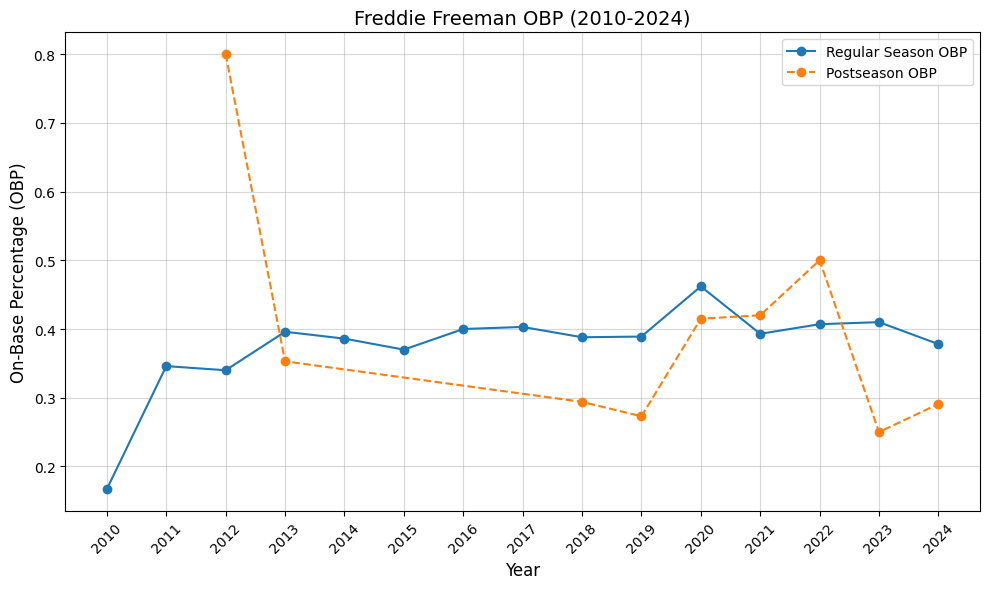

In [ ]:
import matplotlib.pyplot as plt

# Data
years = list(range(2010, 2025))
freeman_obp_rs = [.167, .346, .340, .396, .386, .370, .400, .403, .388, .389, .462, .393, .407, .410, .378]
freeman_obp_ps = [None, None, .800, .353, None, None, None, None, .294, .273, .415, .420, .500, .250, .291]

# Filter years and postseason OBP for years he played in the postseason
postseason_years = [year for year, obp in zip(years, freeman_obp_ps) if obp is not None]
postseason_obp = [obp for obp in freeman_obp_ps if obp is not None]

# Plot
plt.figure(figsize=(10, 6))

# Regular season OBP
plt.plot(years, freeman_obp_rs, label="Regular Season OBP", marker='o')

# Postseason OBP
plt.plot(postseason_years, postseason_obp, label="Postseason OBP", marker='o', linestyle='--')

# Labels and legend
plt.title("Freddie Freeman OBP (2010-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("On-Base Percentage (OBP)", fontsize=12)
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


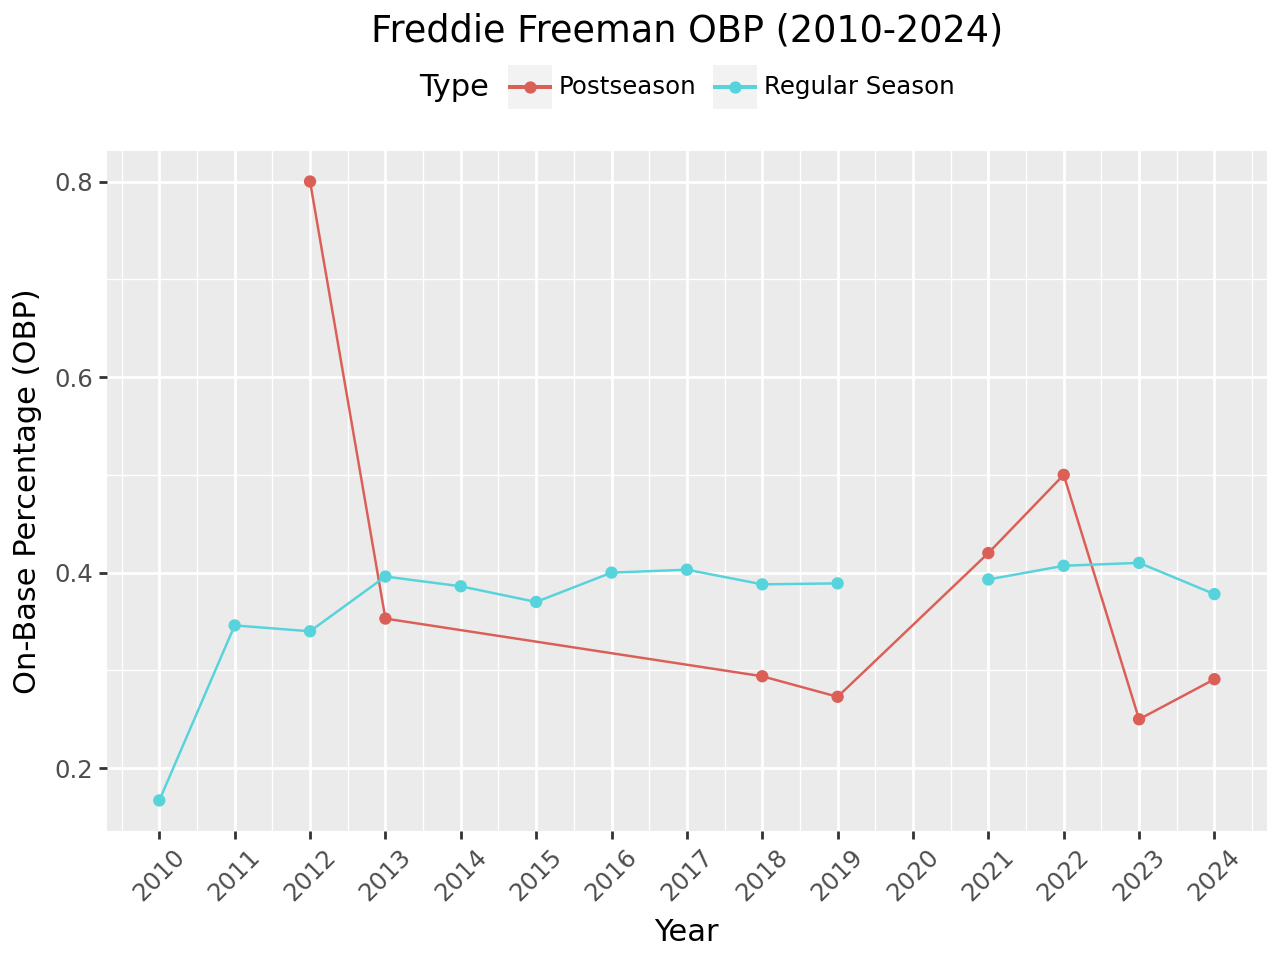

In [ ]:
import pandas as pd
from plotnine import *

# Data
years = list(range(2010, 2025))
freeman_obp_rs = [.167, .346, .340, .396, .386, .370, .400, .403, .388, .389, None, .393, .407, .410, .378]
freeman_obp_ps = [None, None, .800, .353, None, None, None, None, .294, .273, None, .415, .420, .500, .250, .291]

# Filter years and postseason OBP for years he played in the postseason
postseason_years = [year for year, obp in zip(years, freeman_obp_ps) if obp is not None]
postseason_obp = [obp for obp in freeman_obp_ps if obp is not None]

# Create a DataFrame
df = pd.DataFrame({
    'Year': years + postseason_years,
    'OBP': freeman_obp_rs + postseason_obp,
    'Type': ['Regular Season'] * len(years) + ['Postseason'] * len(postseason_years)
})

# Plot
(
    ggplot(df, aes(x='Year', y='OBP', color='Type')) +
    geom_line(aes(group='Type')) +
    geom_point() +
    ggtitle("Freddie Freeman OBP (2010-2024)") +
    xlab("Year") +
    ylab("On-Base Percentage (OBP)") +
    scale_x_continuous(breaks=years) +
    theme(axis_text_x=element_text(angle=45), legend_position='top')
)

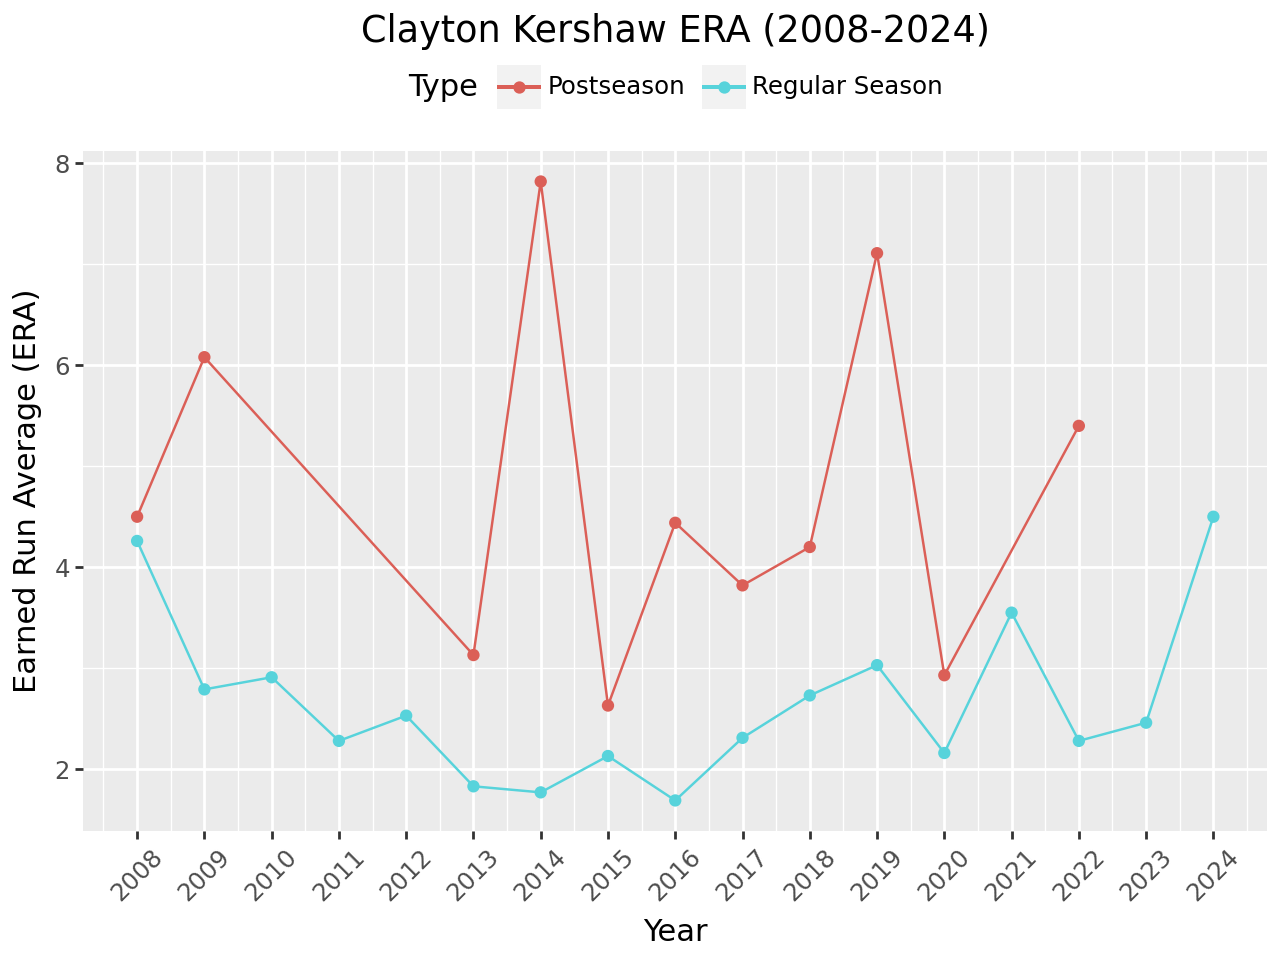

In [ ]:
import pandas as pd
from plotnine import *

# Data
years = list(range(2008, 2025))
kershaw_era_rs = [4.26,2.79,2.91,2.28,2.53,1.83,1.77,2.13,1.69,2.31,2.73,3.03,2.16,3.55,2.28,2.46,4.50]
kershaw_era_ps = [4.50,6.08,None,None,None,3.13,7.82,2.63,4.44,3.82,4.20,7.11,2.93,None,5.40,None,None]

# Filter years and postseason OBP for years he played in the postseason
postseason_years = [year for year, era in zip(years, kershaw_era_ps) if era is not None]
postseason_era = [era for era in kershaw_era_ps if era is not None]

# Create a DataFrame
df = pd.DataFrame({
    'Year': years + postseason_years,
    'ERA': kershaw_era_rs + postseason_era,
    'Type': ['Regular Season'] * len(years) + ['Postseason'] * len(postseason_years)
})

# Plot
(
    ggplot(df, aes(x='Year', y='ERA', color='Type')) +
    geom_line(aes(group='Type')) +
    geom_point() +
    ggtitle("Clayton Kershaw ERA (2008-2024)") +
    xlab("Year") +
    ylab("Earned Run Average (ERA)") +
    scale_x_continuous(breaks=years) +
    theme(axis_text_x=element_text(angle=45), legend_position='top')
)